# Unit 5 - Financial Planning


In [42]:
# Initial imports
# add json import
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [43]:
# Load .env enviroment variables
# Expect "True" output if this is done correctly
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [44]:
# Set monthly household income
monthly_household_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [45]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [46]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
#execute get request on btc & eth & store response as variable
#requests.get(btc_url)
#requests.get(eth_url)
btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)
#use json function from json library to format
#import json, added to initial imports list
btc_data = btc_response_data.json()
eth_data = eth_response_data.json()
#add indents (4) to JSON and output to screen for both btc & eth
print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18473300,
            "total_supply": 18473300,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11511.03,
                    "volume_24h": 20137688437,
                    "market_cap": 212646762164,
                    "percentage_change_1h": -0.0785221930784158,
                    "percentage_change_24h": 2.57533595513744,
                    "percentage_change_7d": -2.95741539071737,
                    "percent_change_1h": -0.0785221930784158,
                    "percent_change_24h": 2.57533595513744,
                    "percent_change_7d": -2.95741539071737
                }
            },
            "last_updated": 1598634492
        }
    },
    "metadata": {
        "timestamp": 1598634492,
        "num_

In [47]:
# Fetch current BTC price
# select current btc price from formatted json data & set as float
# use variable btc_price_current, keep "btc" at the beginning of all variables for quicker identification later
btc_price_current = float(btc_data['data']['1']['quotes']['USD']['price'])
# Fetch current ETH price
# select current eth price from formatted json data & set as float
#use variable eth_price_current, keep "eth" at the beginning of all variables for quicker identification
eth_price_current = float(eth_data['data']['1027']['quotes']['USD']['price'])
# Compute current value of my crpto
# values will equal my_btc*btc_price_current & my_eth*eth_price_current - set new variables
my_btc_value = my_btc*btc_price_current
my_eth_value = my_eth*eth_price_current

# Print current crypto wallet balance format to 0.2
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13813.24
The current value of your 5.3 ETH is $2094.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [48]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [49]:
# Set Alpaca API key and secret
# add api_key var using .getenv
# print var type for each key: expect "str" output if key was imported correctly
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type <class 'str'>


In [50]:
# Format current date as ISO format
today = pd.Timestamp('today', tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
#print(df_portfolio.head())
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.07
Current SPY closing price: $349.4


In [51]:
# Compute the current value of shares
# my_value = shares*close_price
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17470.00
The current value of your 200 AGG shares is $23614.00


### Savings Health Analysis

In [52]:
#set two new variables for total amount of shares and total amount of crypto - my_shares_value & my_crypto_value
my_shares_value = my_agg_value+my_spy_value
my_crypto_value = my_btc_value+my_eth_value
# Create savings DataFrame
# Create dictionary "savings_value" Keys: amount, shares, crypto
savings_value = {   
    "amount":[my_shares_value,my_crypto_value],
    "shares": [my_shares_value],
    "crypto": [my_crypto_value]
}

# use savings_value dict and assign keys to index or columns
# index = "shares" & "crypto"
# columns = "amount"
df_savings = pd.DataFrame(savings_value, index=["shares", "crypto"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
shares,41084.000
crypto,15907.531


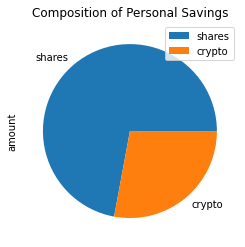

In [53]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [54]:
# Set ideal emergency fund
monthly_income = monthly_household_income
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value+my_crypto_value

# Validate saving health
# adjusted monthly_household_income & reran to check all options will print
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings)} away from reaching your savings goal of ${emergency_fund}!")

Congratulations! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [55]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
# create "start_date_year" variable to identify year you want to go back to

start_date_year = 2015
start_date = pd.Timestamp('today', tz='America/Chicago').replace(year=(start_date_year)).isoformat()
end_date = today

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
# Create ticker var for SPY & AGG
ticker = ['SPY', 'AGG']
#set timeframe to 1D
timeframe = "1D"
#create dataframe "df_stock_data"
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
#df_stock_data = pd.DataFrame(df_historical)
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
2015-08-28 00:00:00-04:00  109.34  109.37  108.9300  109.001  4604866  198.50   
2015-08-31 00:00:00-04:00  109.28  109.37  108.9000  108.920  3866305  198.11   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.010  3083045  193.12   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.900  3273302  194.65   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.040  1676171  196.26   

                                                               
                              high     low   close     volume  
2015-08-28 00:00:00-04:00  199.835  197.92  199.28  111959716  
2015-08-31 00:00:00-04:00  199.125  197.01  197.60  108023599  
2015-09-01 00:00:00-04:00  194.770  190.73  191.61  173963880  
2015-09-02 00:00:00-04:00  195.460  192.42  195.46  120044919  
2015-09-03 00:00:00-04:00  198.050  194.96  195.55  117191452

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Use MC_thirty year: need to call portfolio_data = df_stock_data
# weights = 60/40
# num_simulation = number of runs (500)
# num_trading_days = (always 252 days)*(number of years to run simulation=30)
# adding variables "years", "initial_investment", "investment_increase" - these will need to be updated for challenge questions
# adding variable "trading_days" - this does not need to be updated
year = 30
initial_investment = 20000
investment_increase = 1.5

trading_days = 252*year

#updated MC_thirtyyear to MC_simulation for reusable code

MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = trading_days
)

In [65]:
# Printing the simulation input data

MC_simulation.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
2015-08-28 00:00:00-04:00  109.34  109.37  108.9300  109.001  4604866   
2015-08-31 00:00:00-04:00  109.28  109.37  108.9000  108.920  3866305   
2015-09-01 00:00:00-04:00  108.83  109.11  108.7700  109.010  3083045   
2015-09-02 00:00:00-04:00  108.92  109.05  108.8100  108.900  3273302   
2015-09-03 00:00:00-04:00  109.06  109.12  108.8701  109.040  1676171   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-08-28 00:00:00-04:00          NaN  198.50  199.835  197.92  199.28   
2015-08-31 00:00:00-04:00    -0.000743  198.11  199.125  197.01  197.60   
2015-09-01 00:00:00-04:00     0.000826  193.12  194.770  190.73  191.61   
2015-09-02 00:00:00-04:00    -0.001009  194.65  195.460  192.42  195.46   
2015-09-03 00:00:00-04:00     0.001286  196.26  198.050  194.96  195.55   

                                                   
                              volume daily_return  
2015-08-28 00:00:00-04:00  111959716          NaN  
2015-08-31 00:00:00-04:00  108023599    -0.008430  
2015-09-01 00:00:00-04:00  173963880    -0.030314  
2015-09-02 00:00:00-04:00  120044919     0.020093  
2015-09-03 00:00:00-04:00  117191452     0.000460

In [66]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# .calc_cumulative_return function
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997112,0.998090,1.005664,1.003551,1.001872,1.001737,1.000009,0.991480,0.994593,0.993620,...,0.993281,0.994181,1.001788,0.997431,0.992065,1.004709,1.006919,0.994734,0.995259,0.993534
2,0.993219,0.991954,1.010172,1.007966,1.005817,1.000109,0.993405,0.988250,0.990996,0.988175,...,0.994688,0.996921,0.999318,1.005241,0.989200,0.999660,1.005897,1.000713,0.987507,0.993751
3,0.982202,0.993613,1.010436,1.011995,0.994060,1.007380,0.985211,0.982506,0.993125,0.989827,...,0.993631,0.994554,1.003744,0.999538,0.988882,1.002532,1.006399,1.001742,0.984339,0.998455
4,0.976941,0.993880,1.008757,1.011102,0.997120,1.012489,0.985459,0.994133,0.989089,0.985850,...,1.001014,1.000732,1.001361,1.002593,0.982984,1.007198,1.017038,0.996689,0.986842,1.002370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.783064,4.650568,6.236699,4.414741,5.302417,10.408053,4.313408,9.846508,5.683766,4.921431,...,6.925060,7.983046,6.316196,5.572774,5.445257,2.676638,8.857601,12.833145,8.780852,9.736952
7557,4.784051,4.662604,6.228734,4.426656,5.319977,10.379944,4.319647,9.855199,5.697228,4.965992,...,6.885294,7.915955,6.303882,5.546803,5.462852,2.692130,8.771249,12.772853,8.764285,9.704235
7558,4.781402,4.676917,6.273837,4.458334,5.313047,10.492622,4.295608,9.834161,5.760152,4.960771,...,6.865616,8.000411,6.317542,5.528961,5.482337,2.688500,8.796653,12.829029,8.737335,9.702773
7559,4.770550,4.662239,6.280825,4.458407,5.312929,10.423968,4.286858,9.885001,5.783605,4.941396,...,6.841313,7.928566,6.326073,5.536102,5.492606,2.679277,8.741381,12.888380,8.794048,9.648289


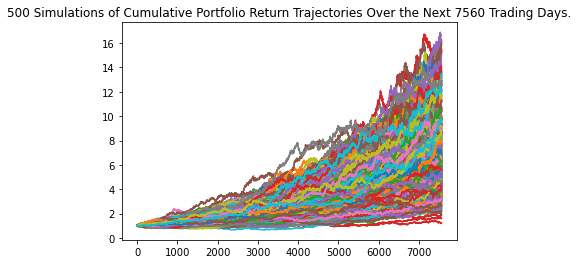

In [67]:
# Plot simulation outcomes
line_plot = MC_simulation.plot_simulation()


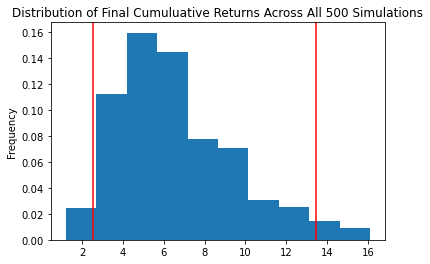

In [68]:
# Plot probability distribution and confidence intervals

dist_plot = MC_simulation.plot_distribution()

### Retirement Analysis

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_simulation.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              6.611535
std               2.898650
min               1.197766
25%               4.464498
50%               6.096319
75%               8.295117
max              16.110894
95% CI Lower      2.533189
95% CI Upper     13.456653
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [70]:
# initial_investment set at top

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000



ci_lower = round(tbl[8]*initial_investment)
ci_upper = round(tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50664.0 and $269133.0


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [71]:
# Set initial investment
# updated initial investment to initial_investment_increase so initial_investment won't be overwritten in later code
initial_investment_increase = initial_investment*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


ci_lower = round(tbl[8]*initial_investment_increase)
ci_upper = round(tbl[9]*initial_investment_increase)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75996.0 and $403700.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
#STOP HERE: Commented out code for long version of Optional Challenge go to 3rd cell under Section Part 2 and update variables to change simulation

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# change num_trading_days = 252*5
"""MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)"""

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
"""MC_fiveyear.portfolio_data.head()"""

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!
"""line_plot_five = MC_fiveyear.plot_simulation()"""

In [ ]:
# Plot probability distribution and confidence intervals
"""dist_plot_five = MC_fiveyear.plot_distribution()"""

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
"""tbl_five = MC_fiveyear.summarize_cumulative_return()
"""
# Print summary statistics
"""print(tbl_five)"""

In [ ]:
# Set initial investment
# previously set (20000)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

"""ci_lower_five = round(tbl_five[8]*initial_investment)
ci_upper_five = round(tbl_five[9]*initial_investment)"""

# Print results
"""print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")"""

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# change num_trading_days = 252*10
"""MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)"""

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

"""MC_tenyear.portfolio_data.head()"""

In [ ]:
# Plot simulation outcomes
"""line_plot_ten = MC_tenyear.plot_simulation()"""

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
"""dist_plot_ten = MC_tenyear.plot_distribution()"""

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
"""tbl_ten = MC_tenyear.summarize_cumulative_return()
"""# Print summary statistics
"""print(tbl_ten)"""

In [ ]:
# Set initial investment

"""ci_lower_ten = round(tbl_ten[8]*initial_investment)
ci_upper_ten = round(tbl_ten[9]*initial_investment)"""
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
"""print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")"""